In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10


In [38]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/london_merged.csv',parse_dates=['timestamp'], index_col="timestamp" )

In [39]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Metadata:

"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"windspeed" - wind speed in km/h
"weathercode" - category of the weather
"isholiday" - boolean field - 1 holiday / 0 non holiday
"isweekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [40]:
df.shape

(17414, 9)

In [41]:
df['hour'] = df.index.hour

In [42]:
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [43]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


Text(0.5, 1.0, 'No of Bicycle Counts')

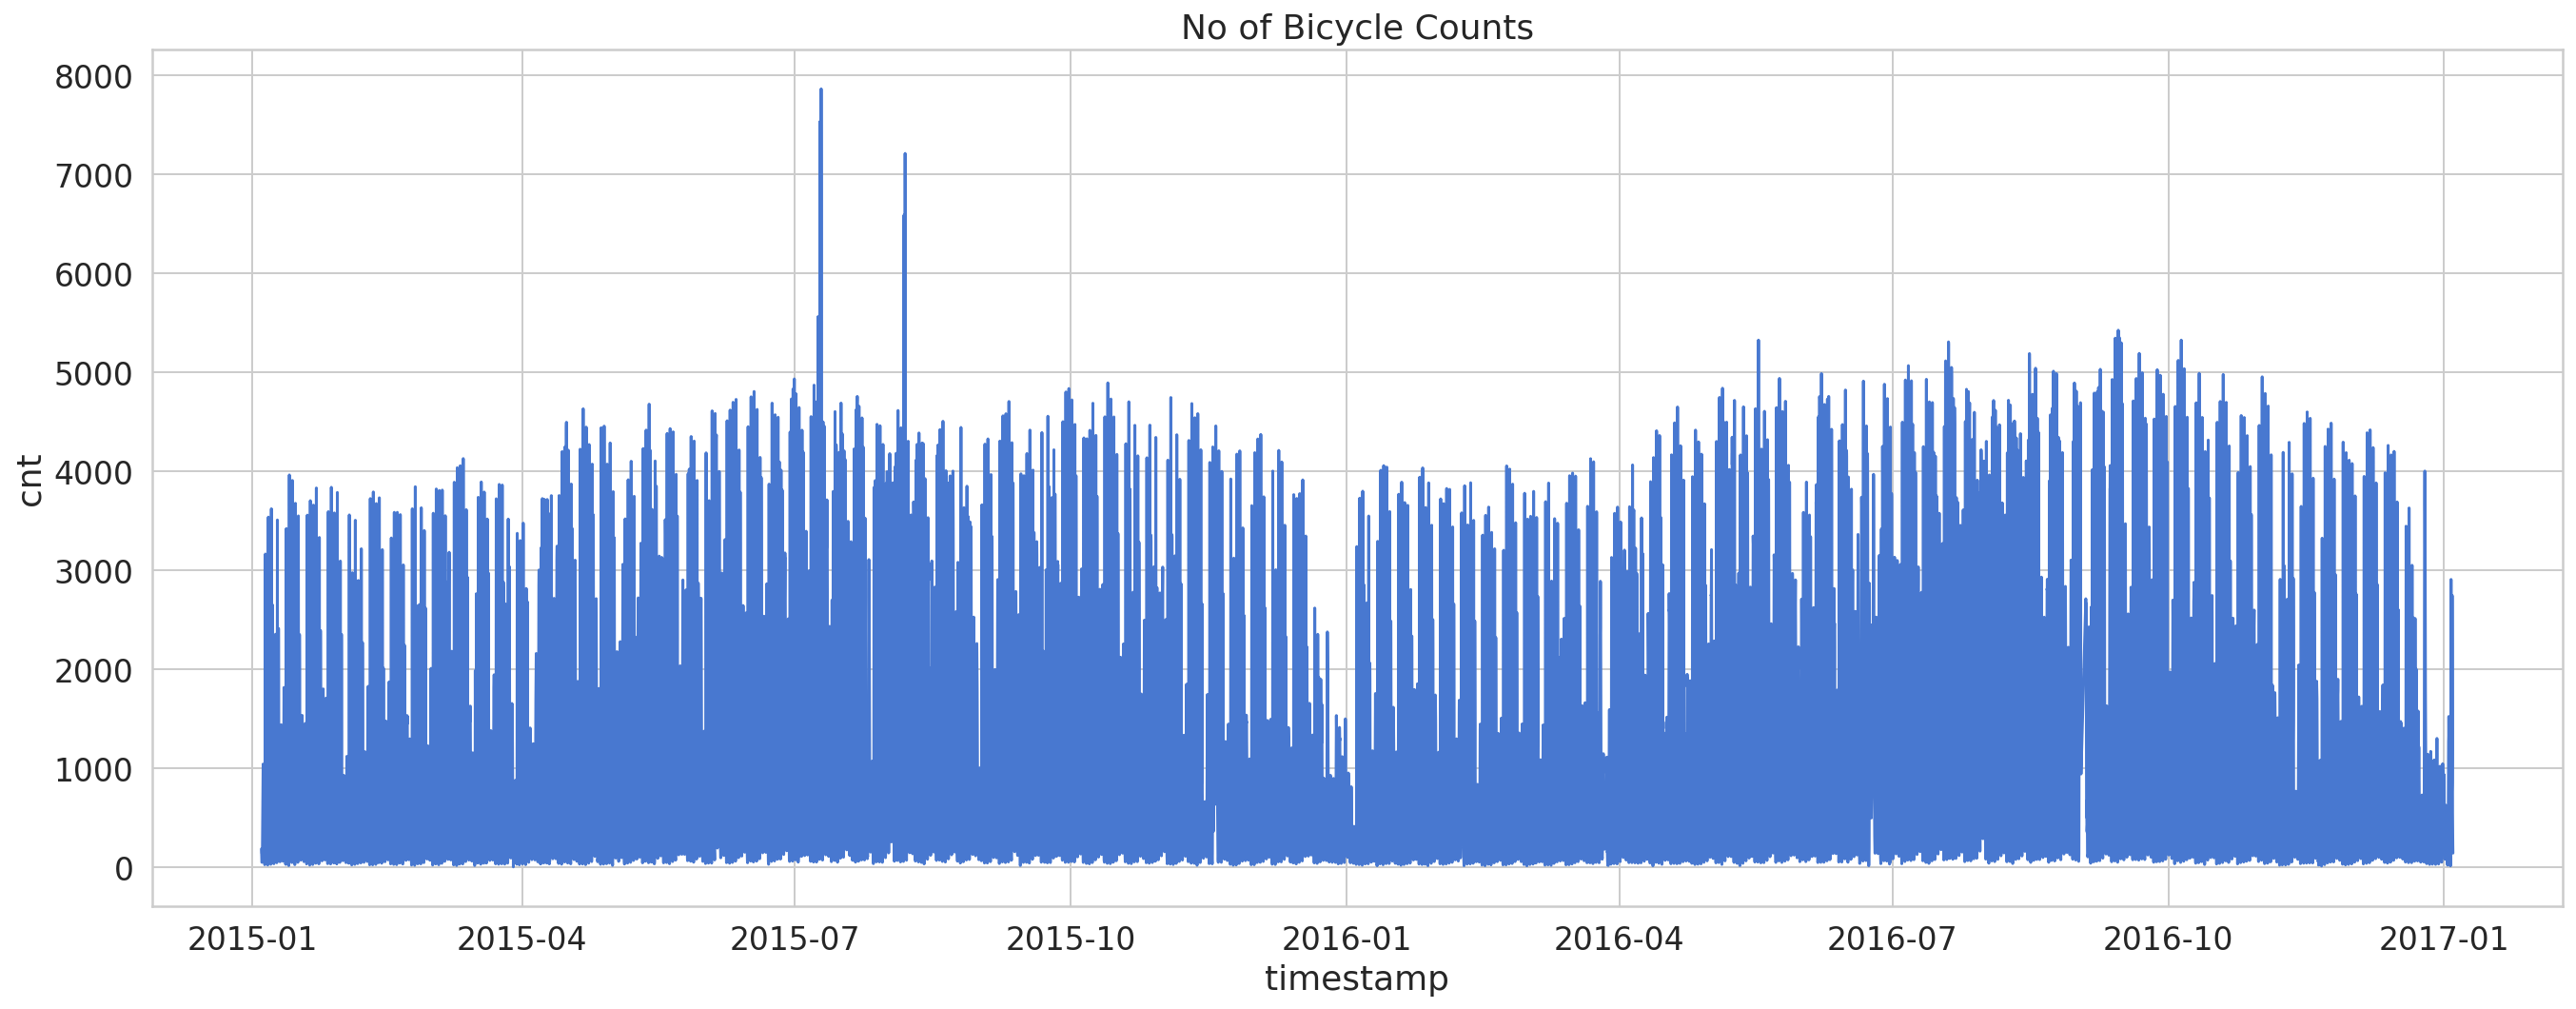

In [75]:

a4_dims = (22.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=df.index, y ='cnt', data=df  )
plt.title('No of Bicycle Counts')

Text(0.5, 1.0, 'No of Bicycle Counts on each Month')

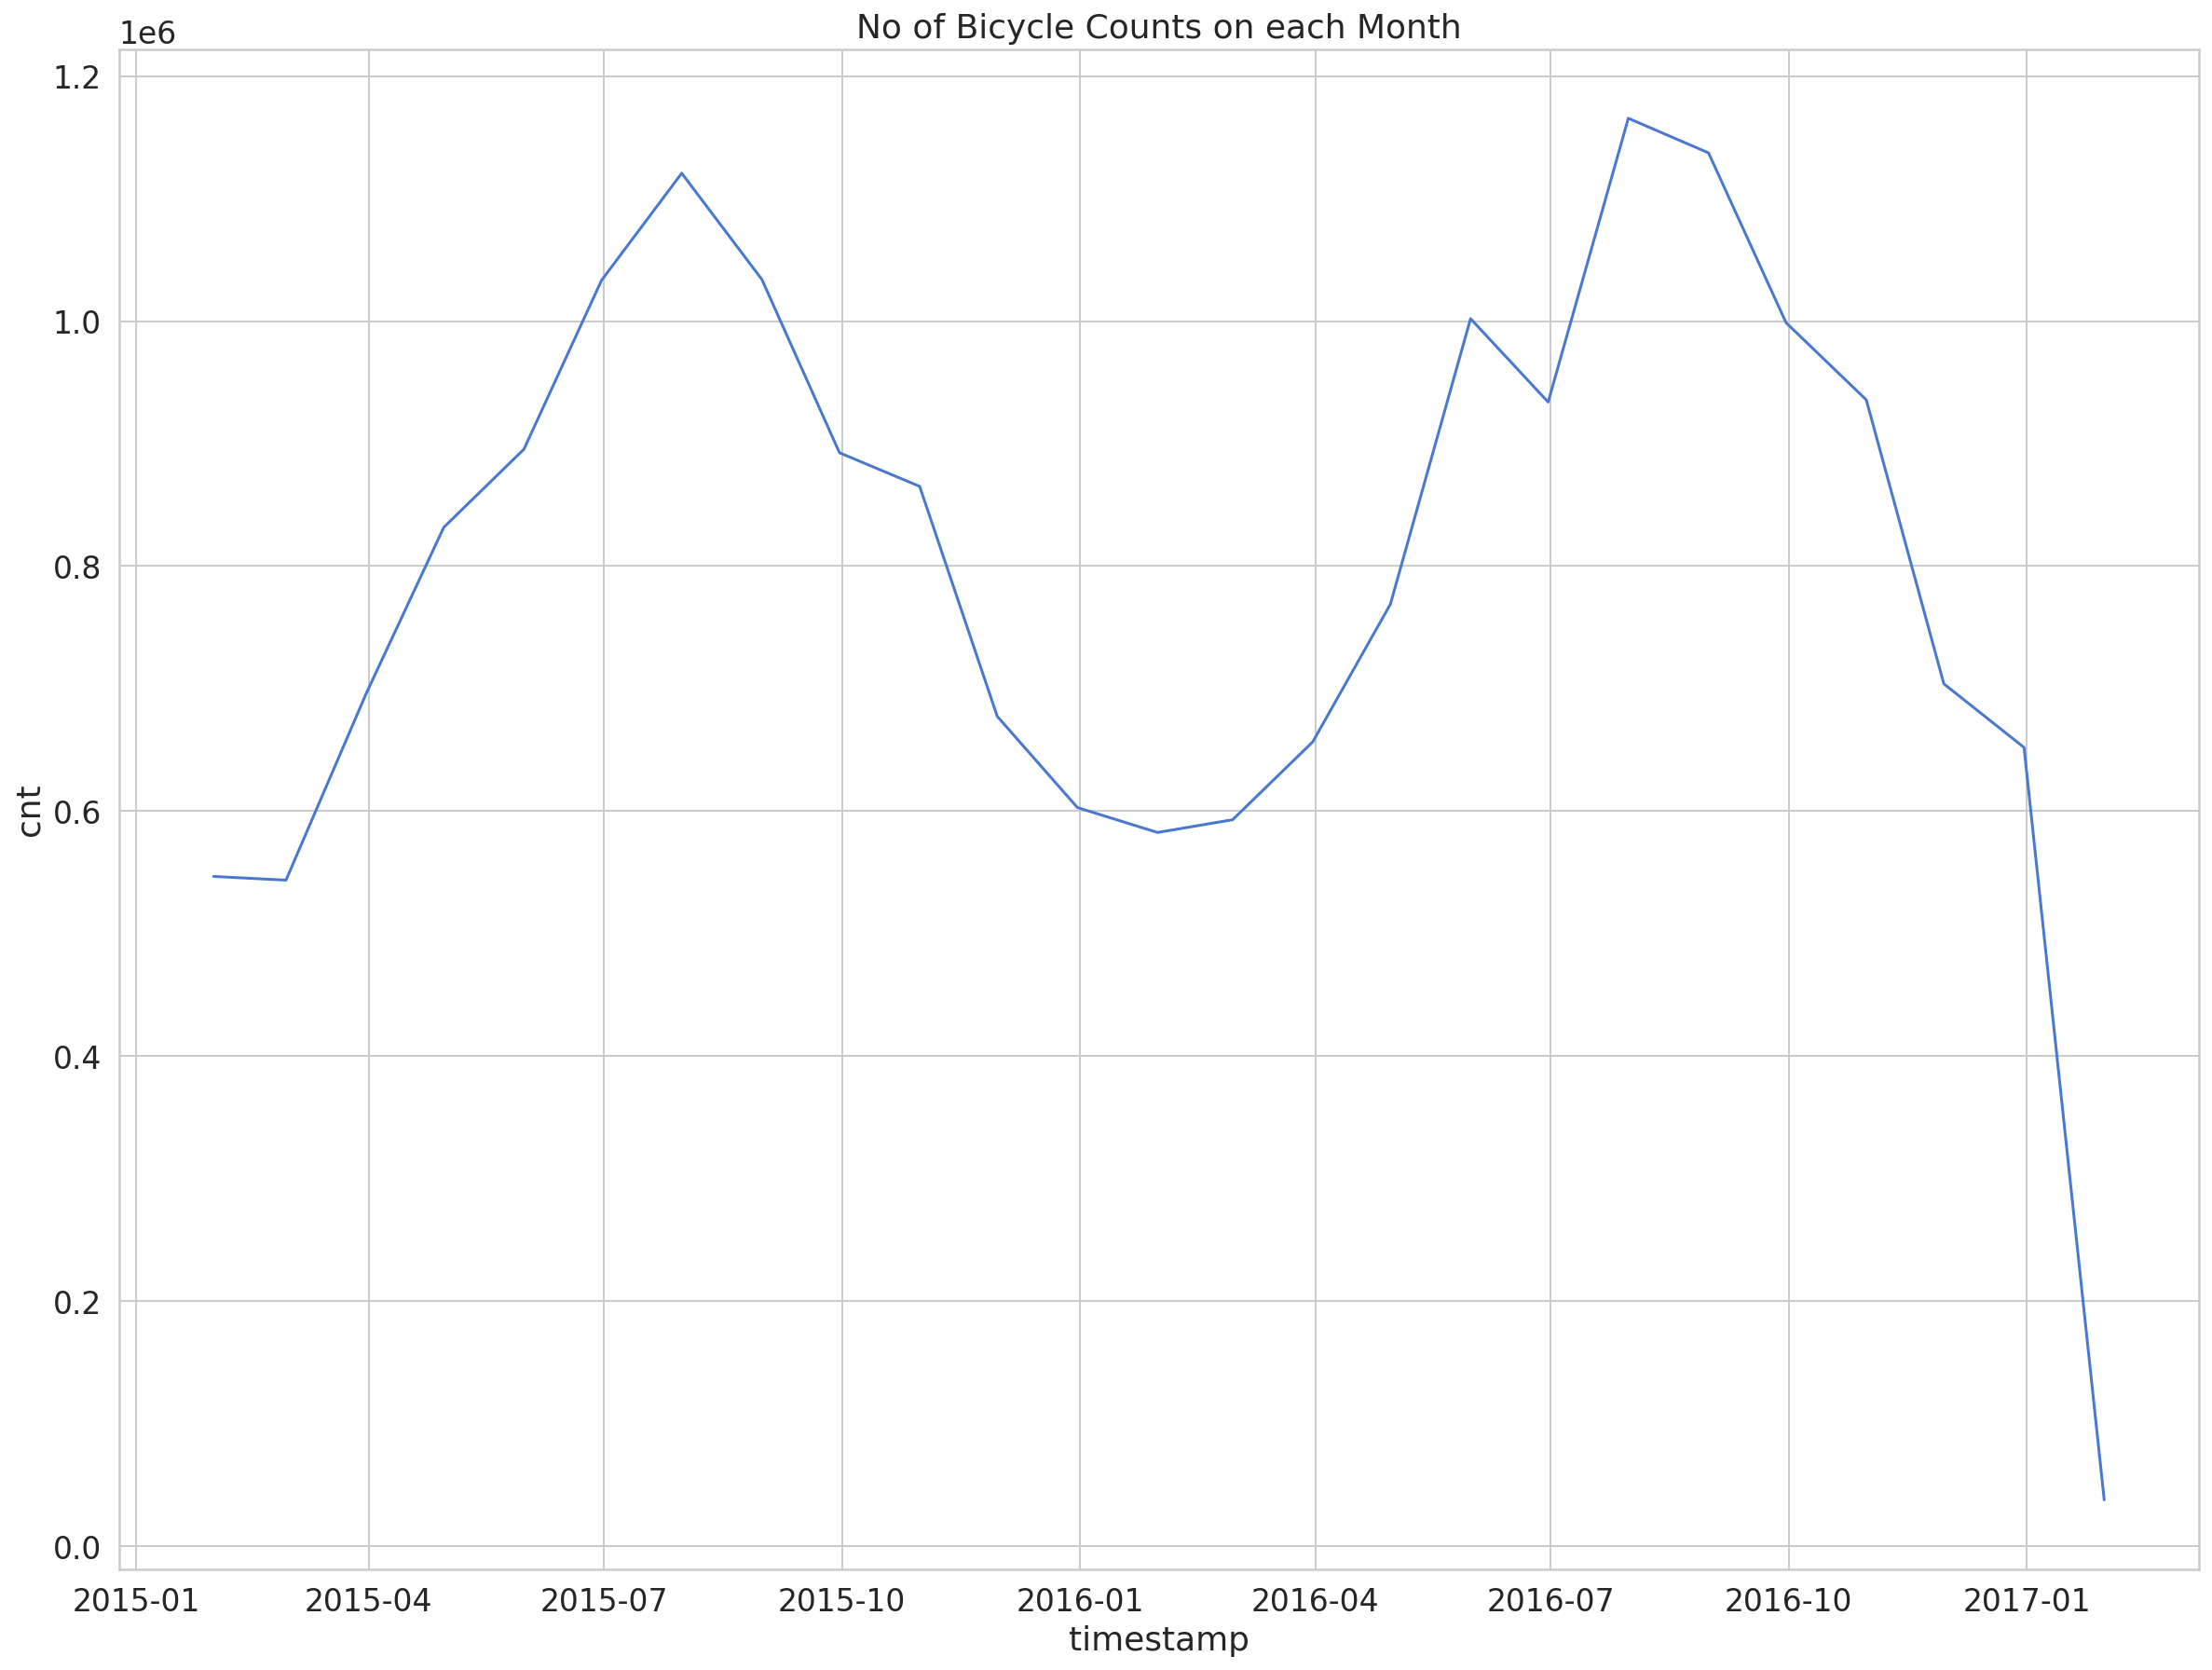

In [76]:
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y='cnt', data=df_by_month)
plt.title('No of Bicycle Counts on each Month')

In [46]:
df.hour

timestamp
2015-01-04 00:00:00     0
2015-01-04 01:00:00     1
2015-01-04 02:00:00     2
2015-01-04 03:00:00     3
2015-01-04 04:00:00     4
                       ..
2017-01-03 19:00:00    19
2017-01-03 20:00:00    20
2017-01-03 21:00:00    21
2017-01-03 22:00:00    22
2017-01-03 23:00:00    23
Name: hour, Length: 17414, dtype: int64

Text(0.5, 1.0, 'No of Bicycle count during Seasons')

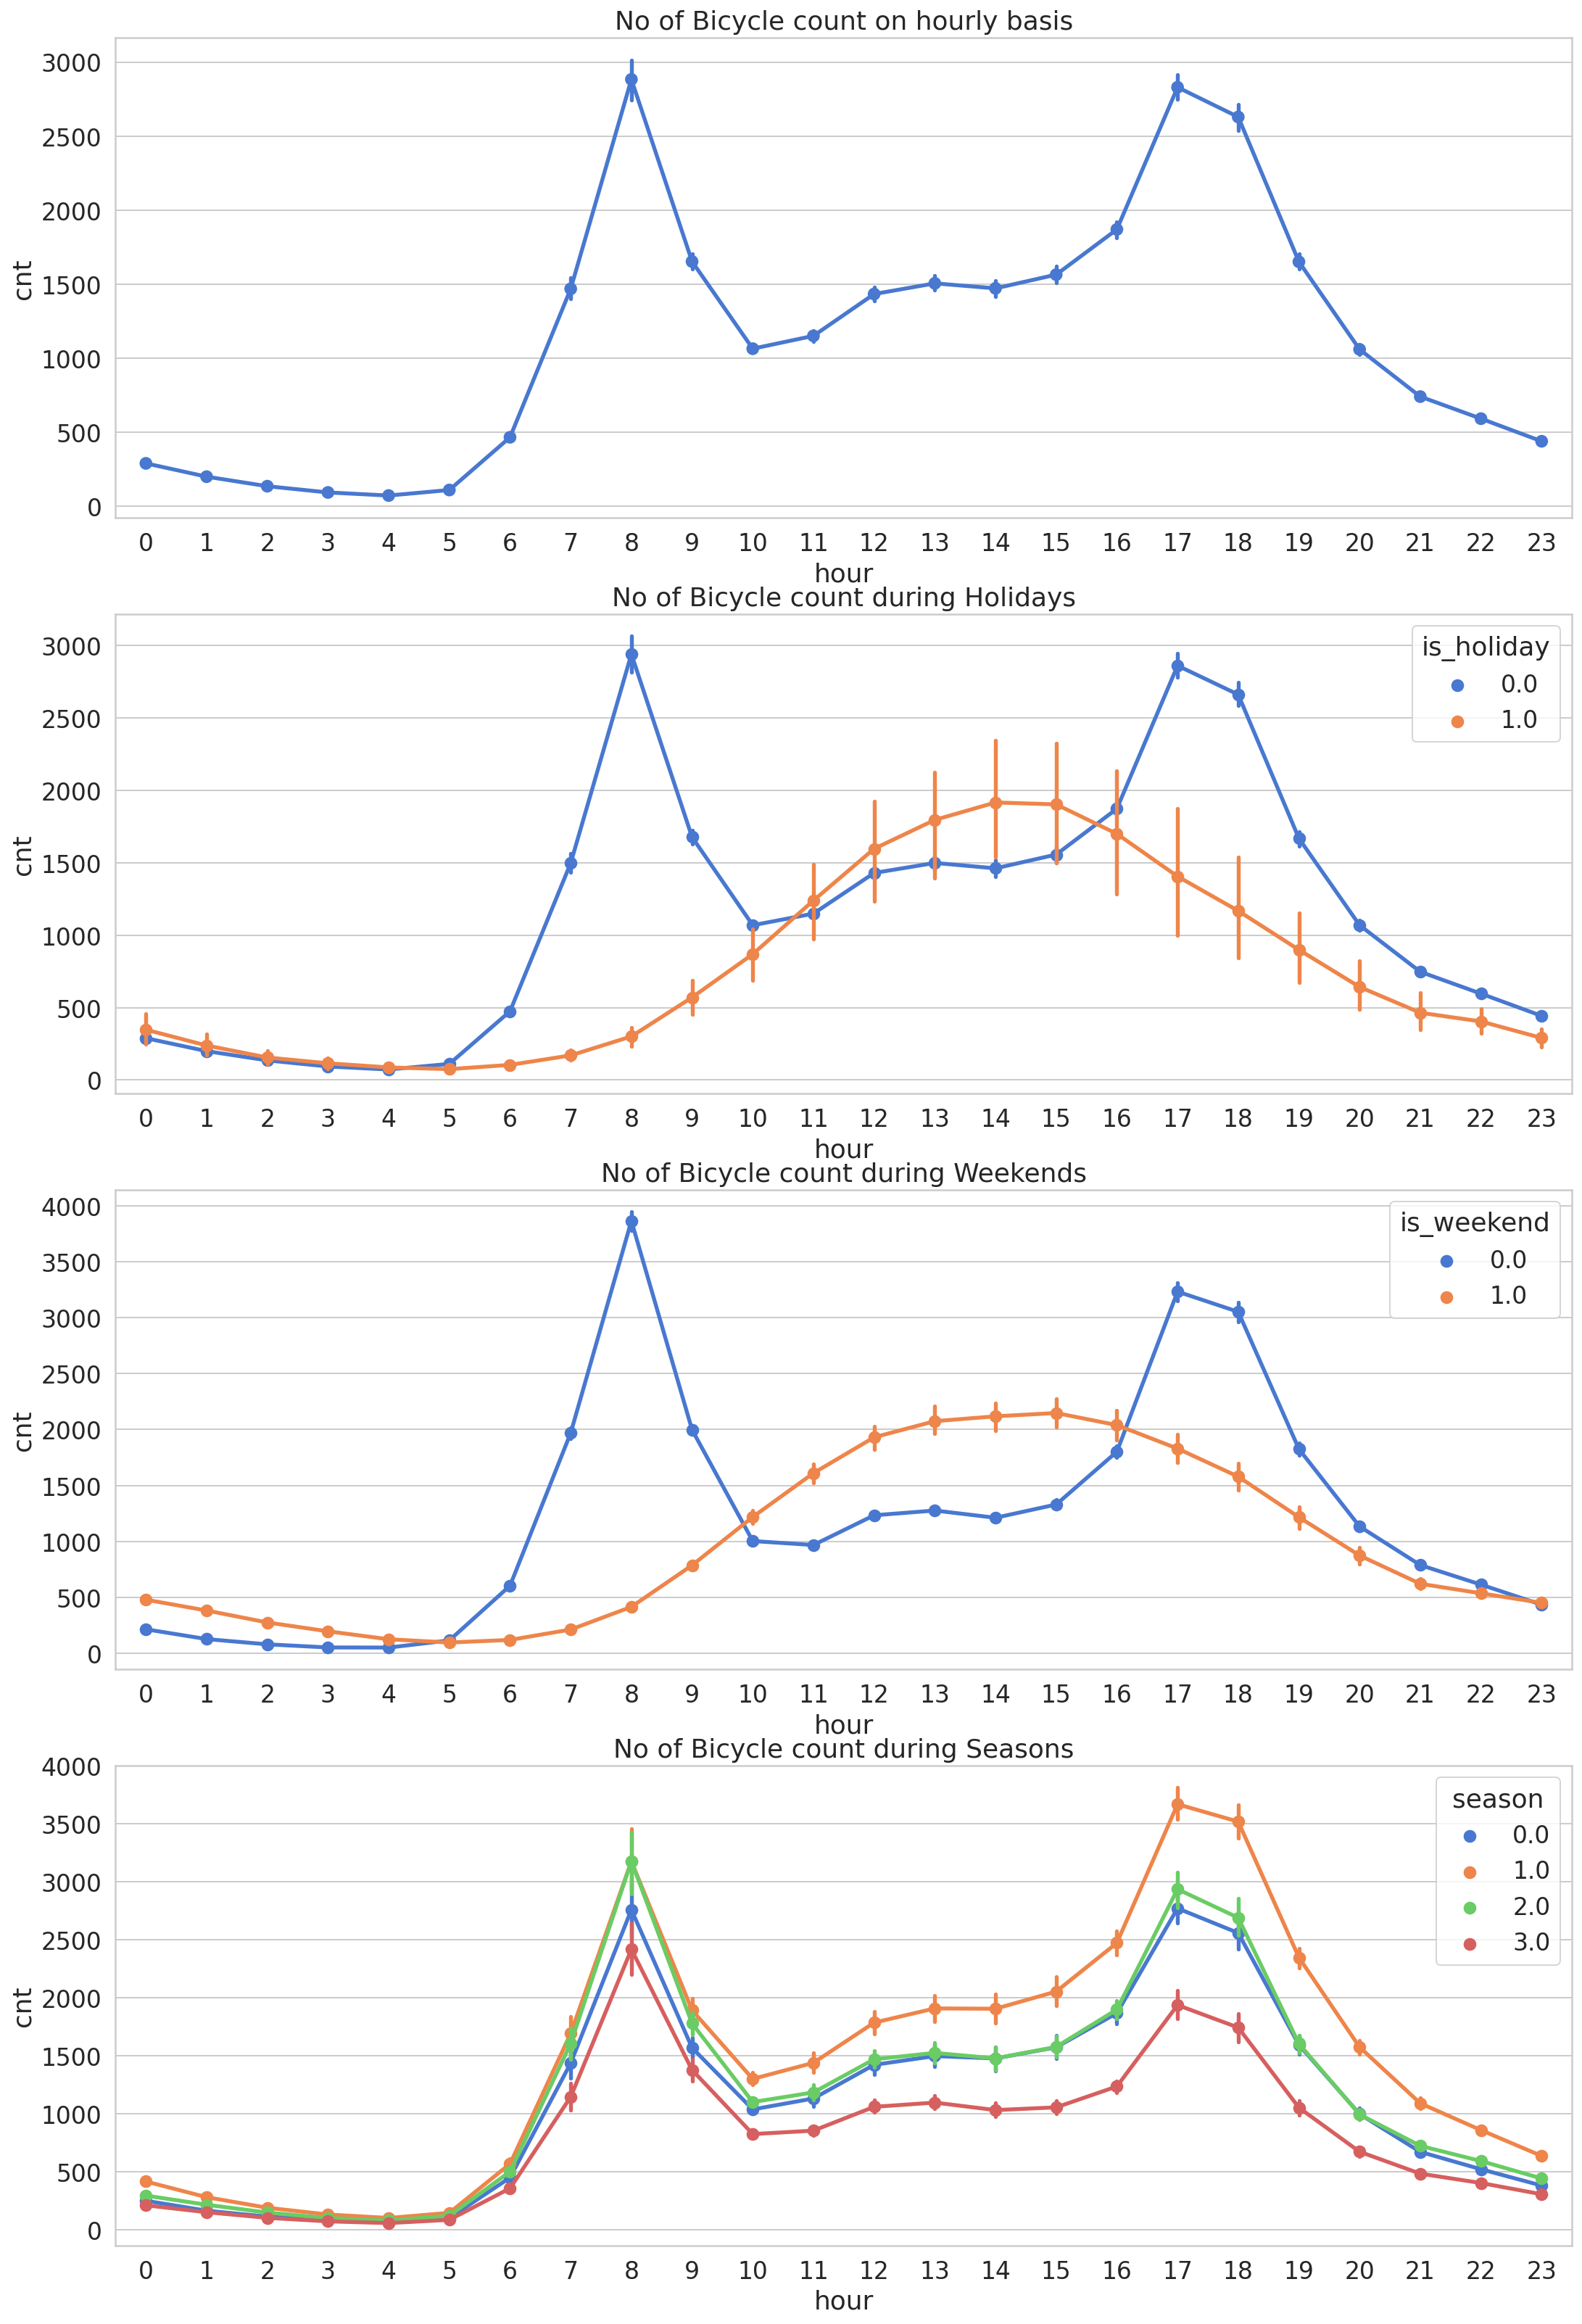

In [78]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4)
fig.set_size_inches(18,28)


sns.pointplot(data=df, x='hour', y='cnt', ax=ax1 ).set_title('No of Bicycle count on hourly basis')
sns.pointplot(data=df, x='hour', y='cnt', ax=ax2, hue='is_holiday').set_title('No of Bicycle count during Holidays')
sns.pointplot(data=df, x='hour', y='cnt', ax=ax3, hue='is_weekend').set_title('No of Bicycle count during Weekends')
sns.pointplot(data=df, x='hour', y='cnt', ax=ax4, hue='season').set_title('No of Bicycle count during Seasons')

Text(0.5, 1.0, 'No of Bicycle count during the Season week')

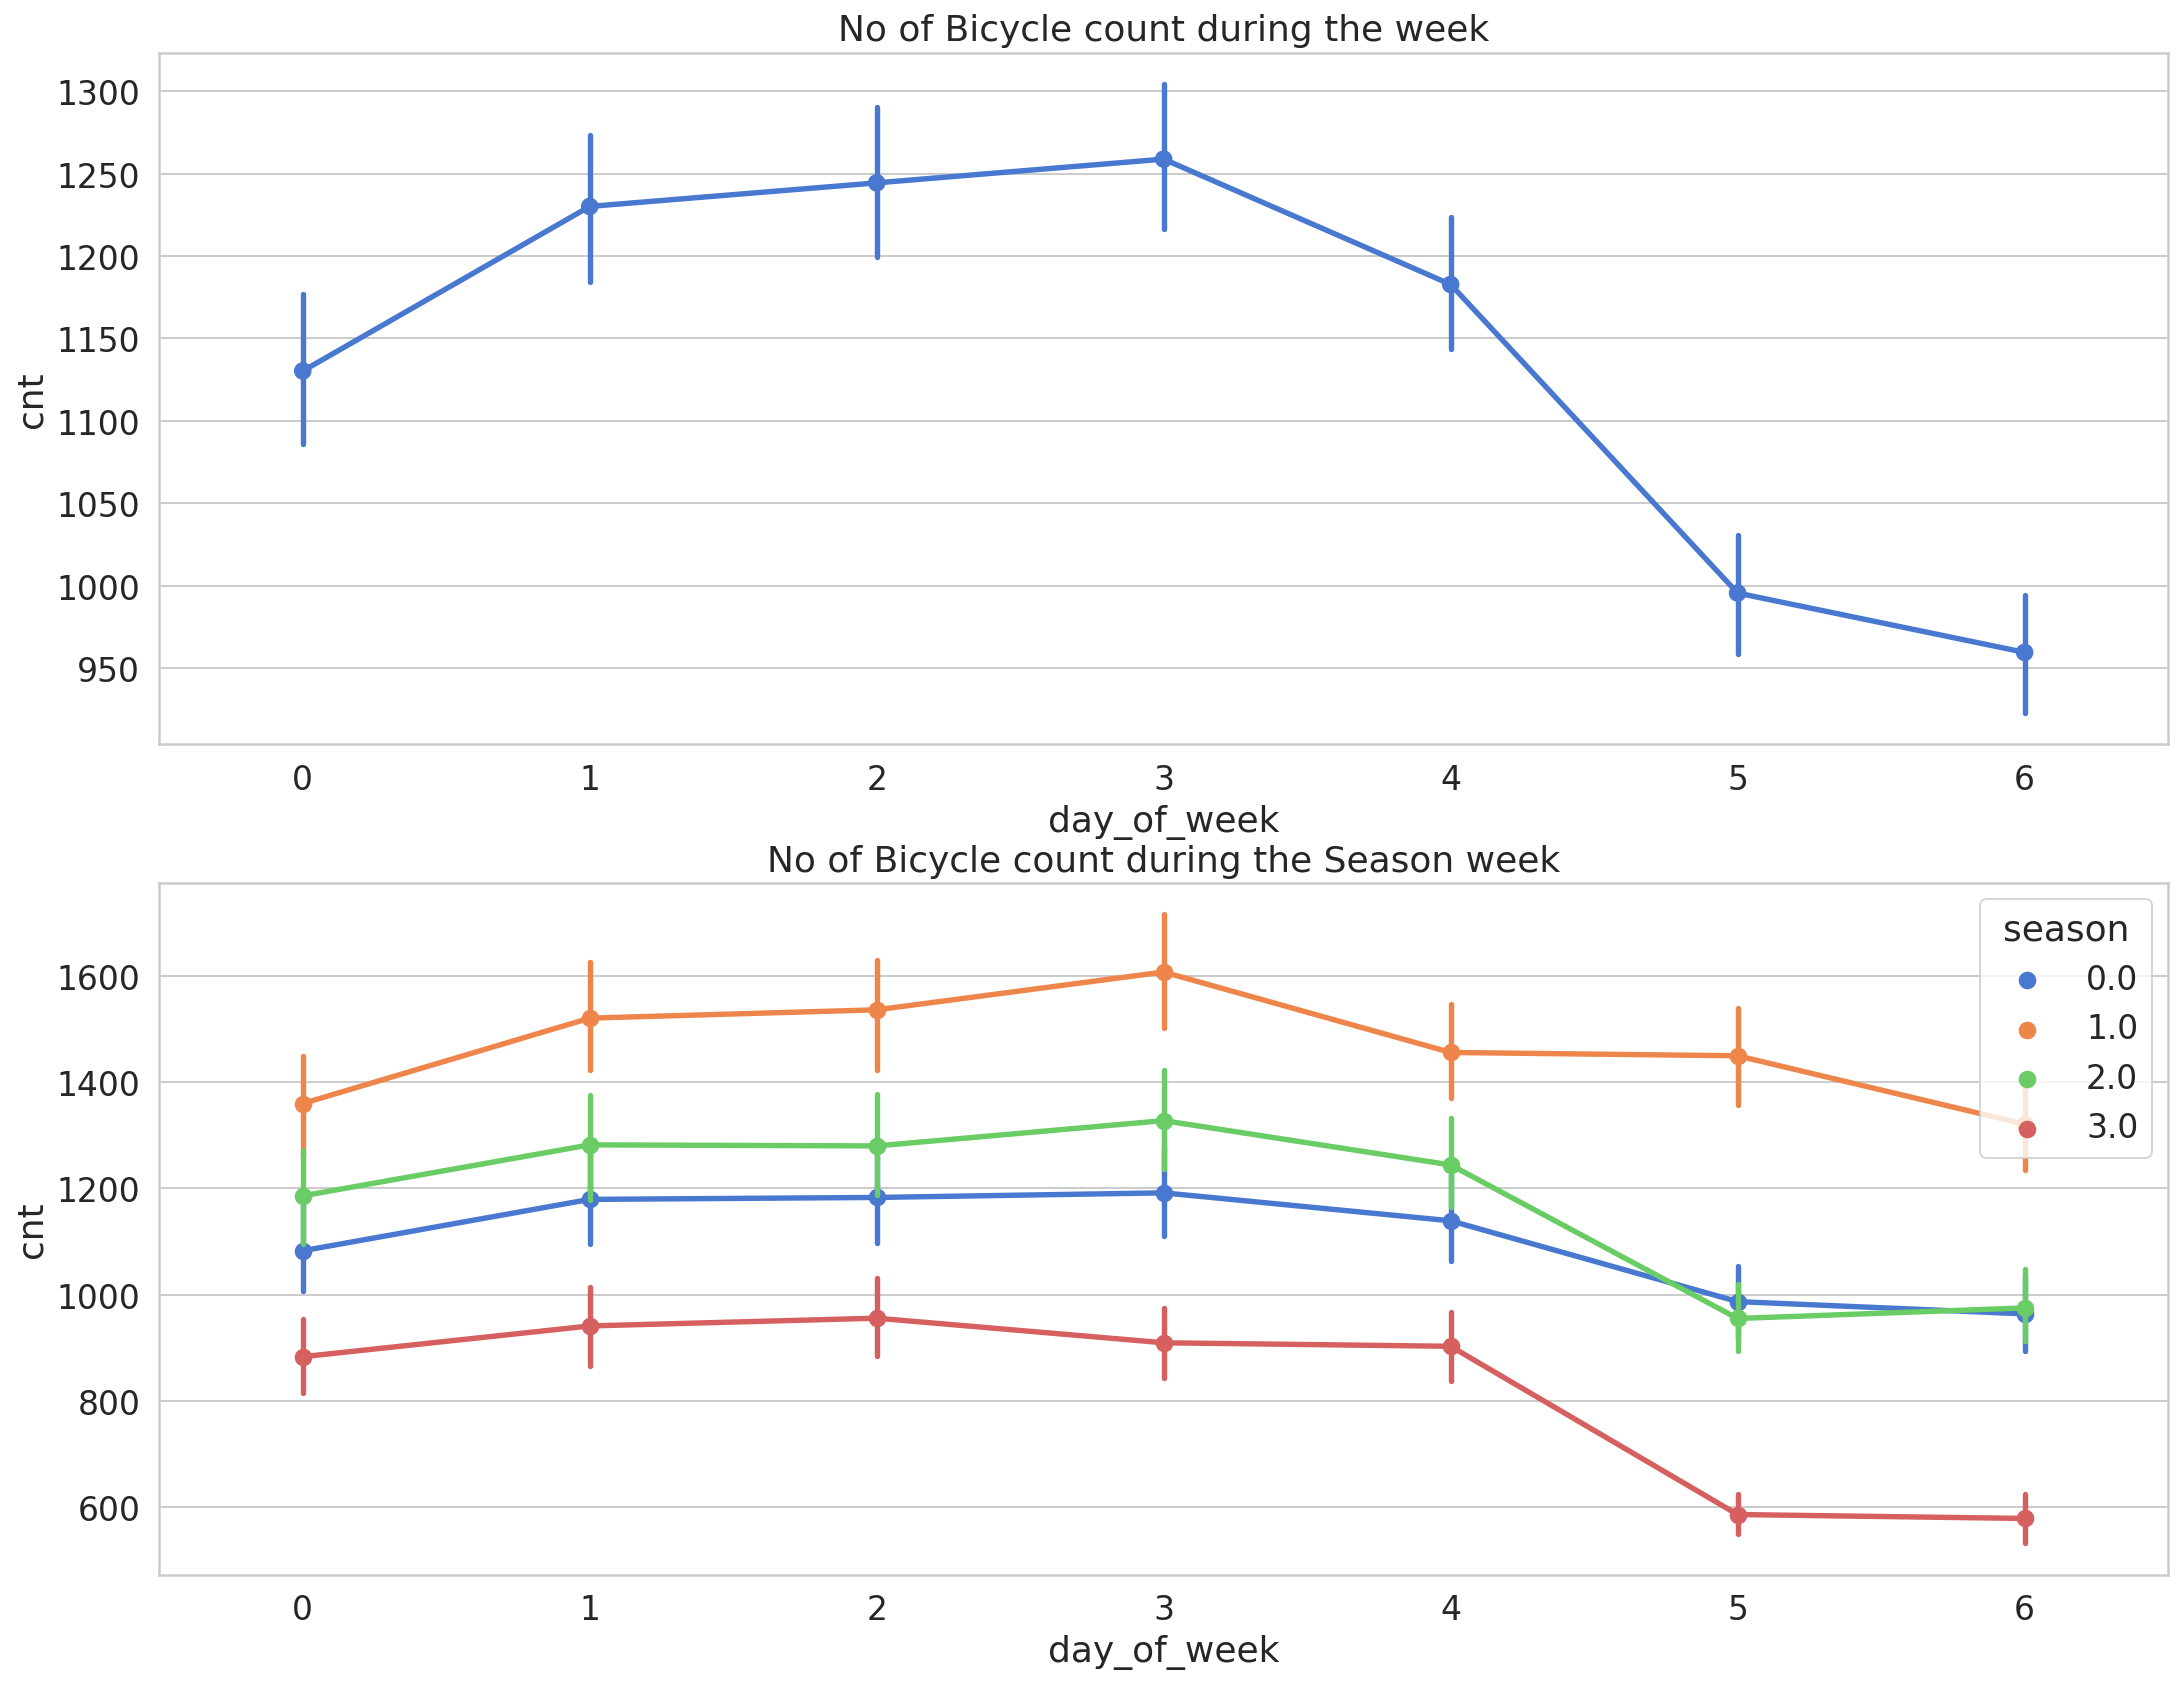

In [79]:
fig,(ax1, ax2)= plt.subplots(nrows=2)
fig.set_size_inches(18, 14)

sns.pointplot(data=df, x='day_of_week', y='cnt', ax=ax1).set_title('No of Bicycle count during the week')
sns.pointplot(data=df, x='day_of_week', y='cnt', hue='season', ax=ax2).set_title('No of Bicycle count during the Season week')

In [49]:
train_size = int(len(df)*0.9)

test_size = len(df)- train_size

train,test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(train.shape, test.shape)

(15672, 13) (1742, 13)


Preprocessing

In [50]:
df.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1


In [51]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
f_transformer

cnt_transformer = cnt_transformer.fit(train[['cnt']])

In [52]:
train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
train.head(3)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.464876,-1.2500,-1.047619,0.975,-0.818182,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,-0.495179,-1.2500,-1.000000,0.975,-0.909091,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,-0.497934,-1.3125,-1.000000,1.150,-1.363636,1.0,0.0,1.0,3.0,2,4,6,1


In [54]:
test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Cutting the data into Sub-sequences**

In [55]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [56]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15648, 24, 13) (15648,)


In [57]:
#Modeling

model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=128,
            input_shape=(X_train.shape[1], X_train.shape[2])
        )
    )
)

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='Adam')

In [58]:
history= model.fit(
    X_train,y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/50
441/441 [==============================] - 11s 17ms/step - loss: 0.3427 - val_loss: 0.2496
Epoch 2/50
441/441 [==============================] - 7s 16ms/step - loss: 0.1324 - val_loss: 0.0613
Epoch 3/50
441/441 [==============================] - 7s 16ms/step - loss: 0.0634 - val_loss: 0.0467
Epoch 4/50
441/441 [==============================] - 7s 16ms/step - loss: 0.0482 - val_loss: 0.0477
Epoch 5/50
441/441 [==============================] - 7s 16ms/step - loss: 0.0346 - val_loss: 0.0449
Epoch 6/50
441/441 [==============================] - 7s 16ms/step - loss: 0.0306 - val_loss: 0.0426
Epoch 7/50
441/441 [==============================] - 7s 16ms/step - loss: 0.0265 - val_loss: 0.0377
Epoch 8/50
441/441 [==============================] - 7s 17ms/step - loss: 0.0238 - val_loss: 0.0407
Epoch 9/50
441/441 [==============================] - 7s 16ms/step - loss: 0.0232 - val_loss: 0.0363
Epoch 10/50
441/441 [==============================] - 7s 16ms/step - loss: 0.0218 - val_l

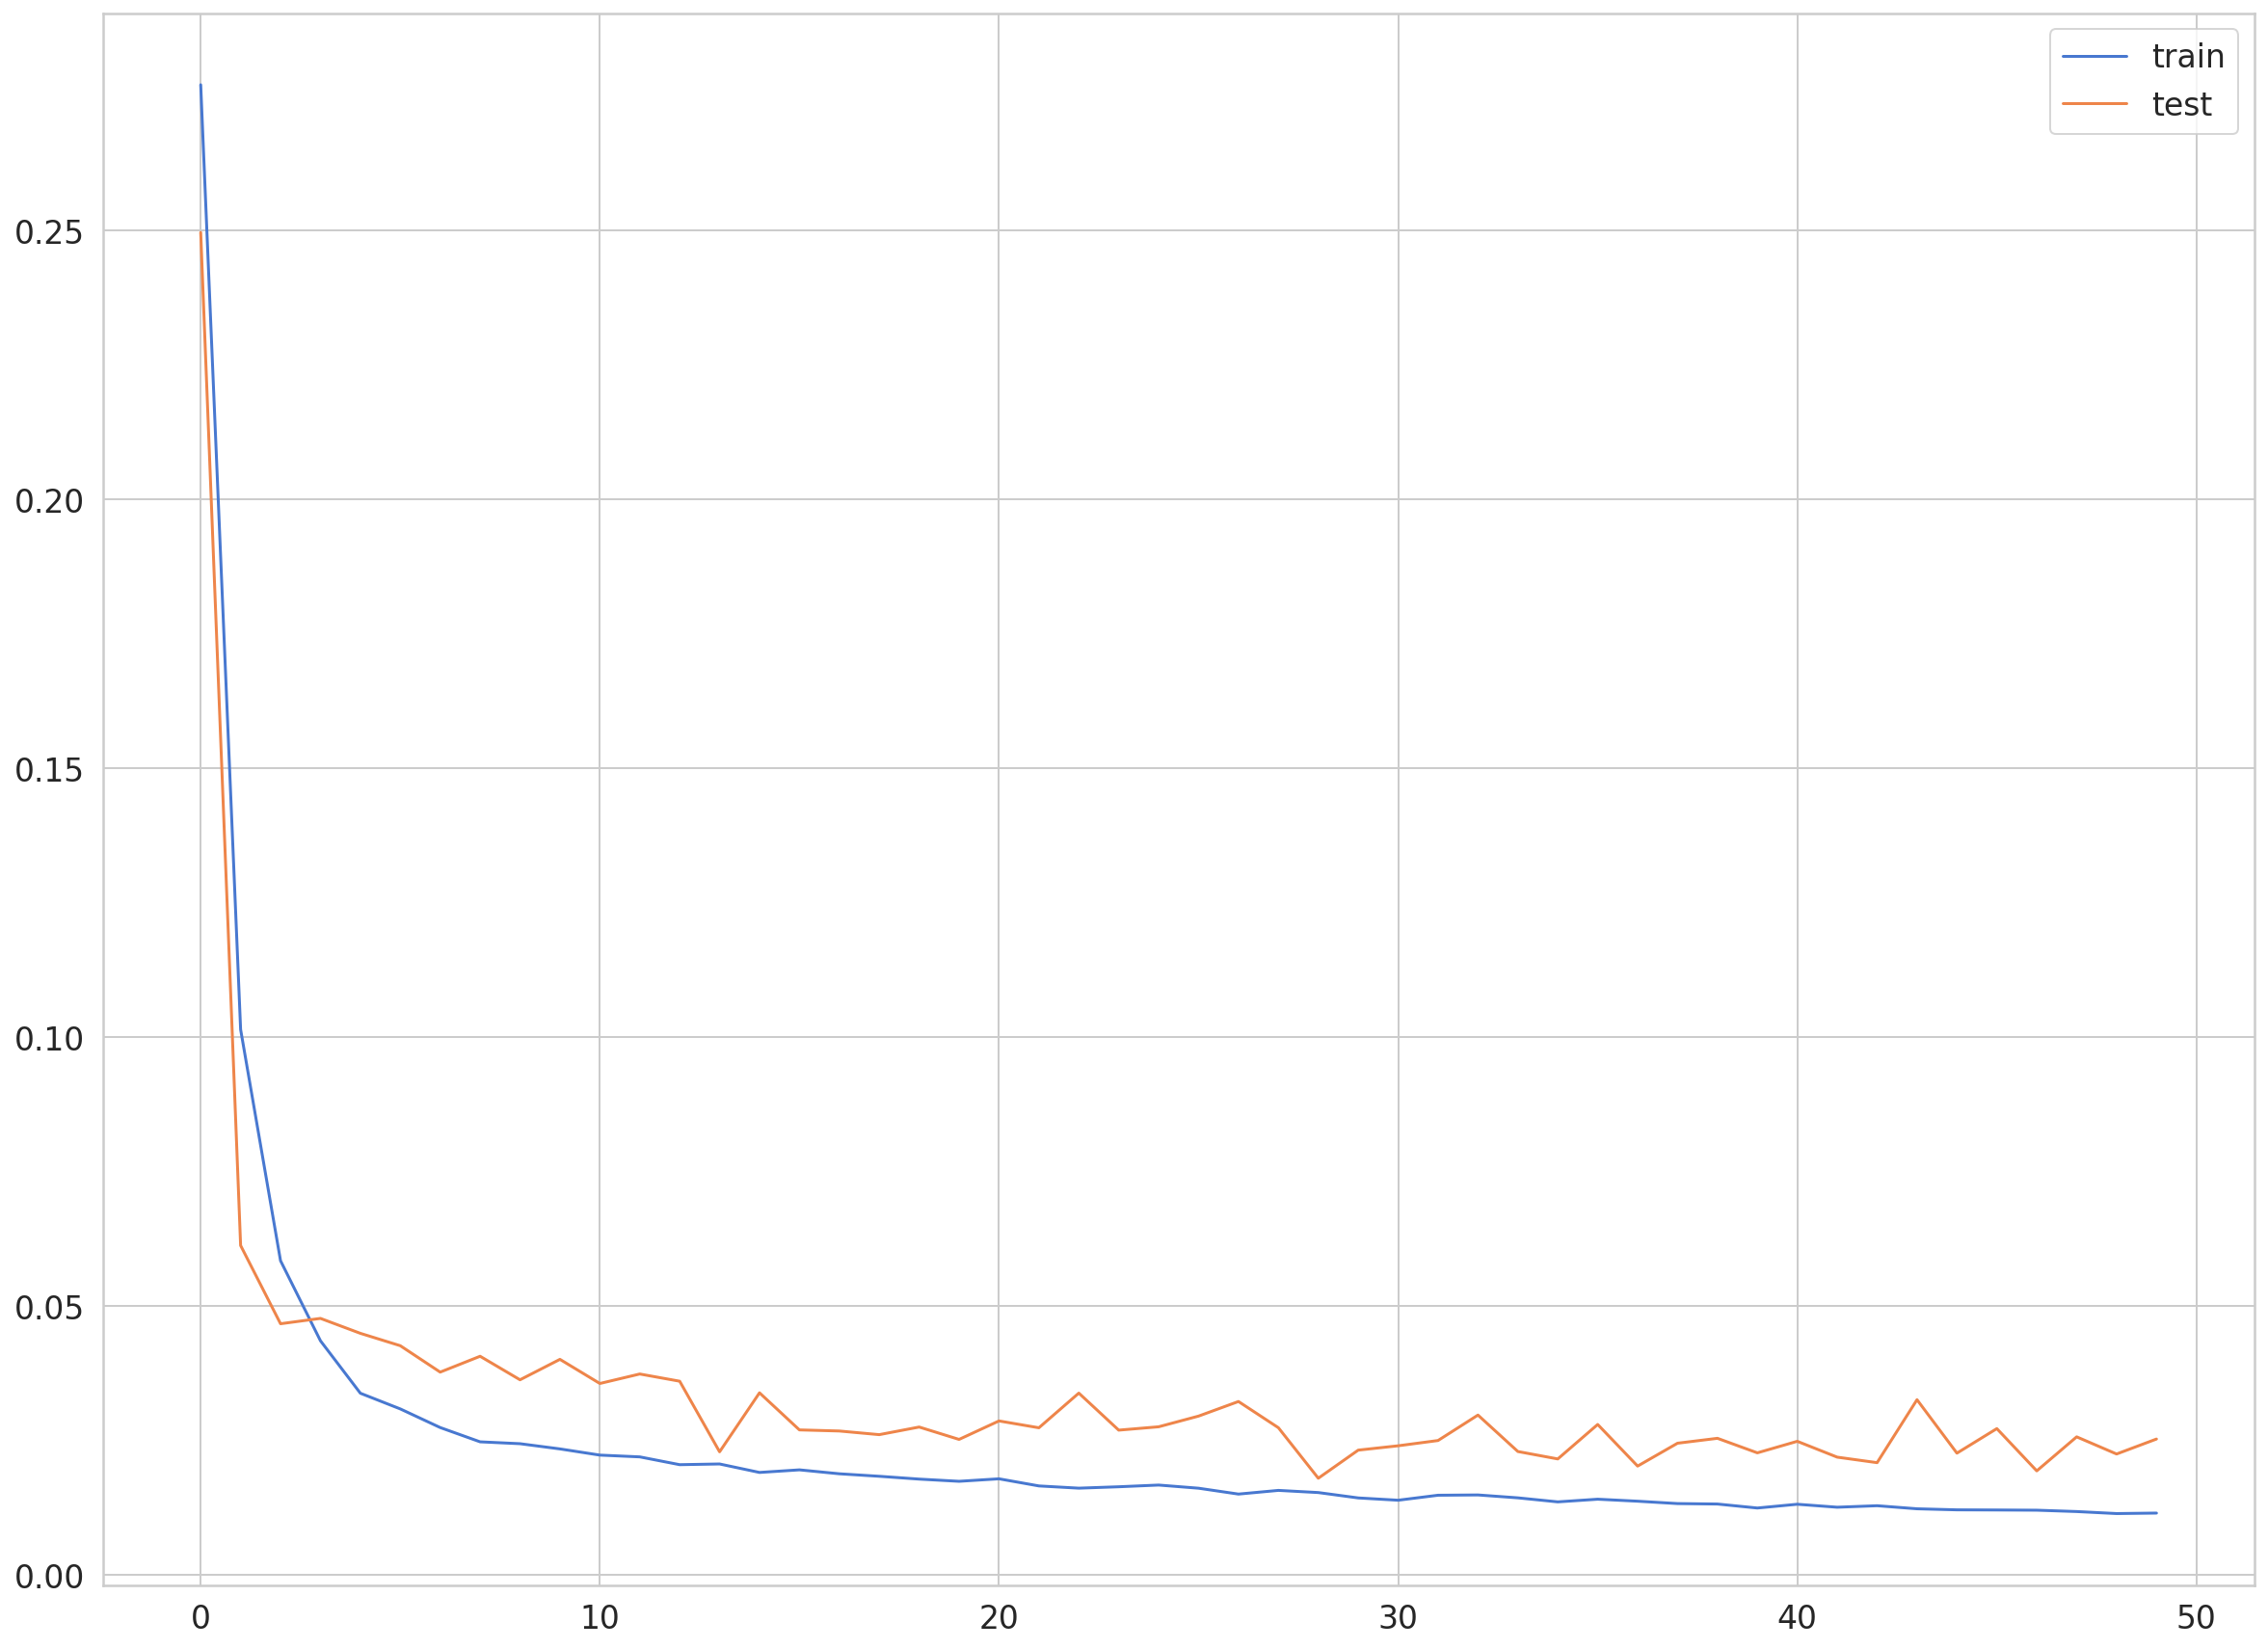

In [59]:
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [60]:
y_pred = model.predict(X_test)

In [61]:
###Performing Inverse scale

In [62]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [63]:
y_pred_inv.shape

(1718, 1)

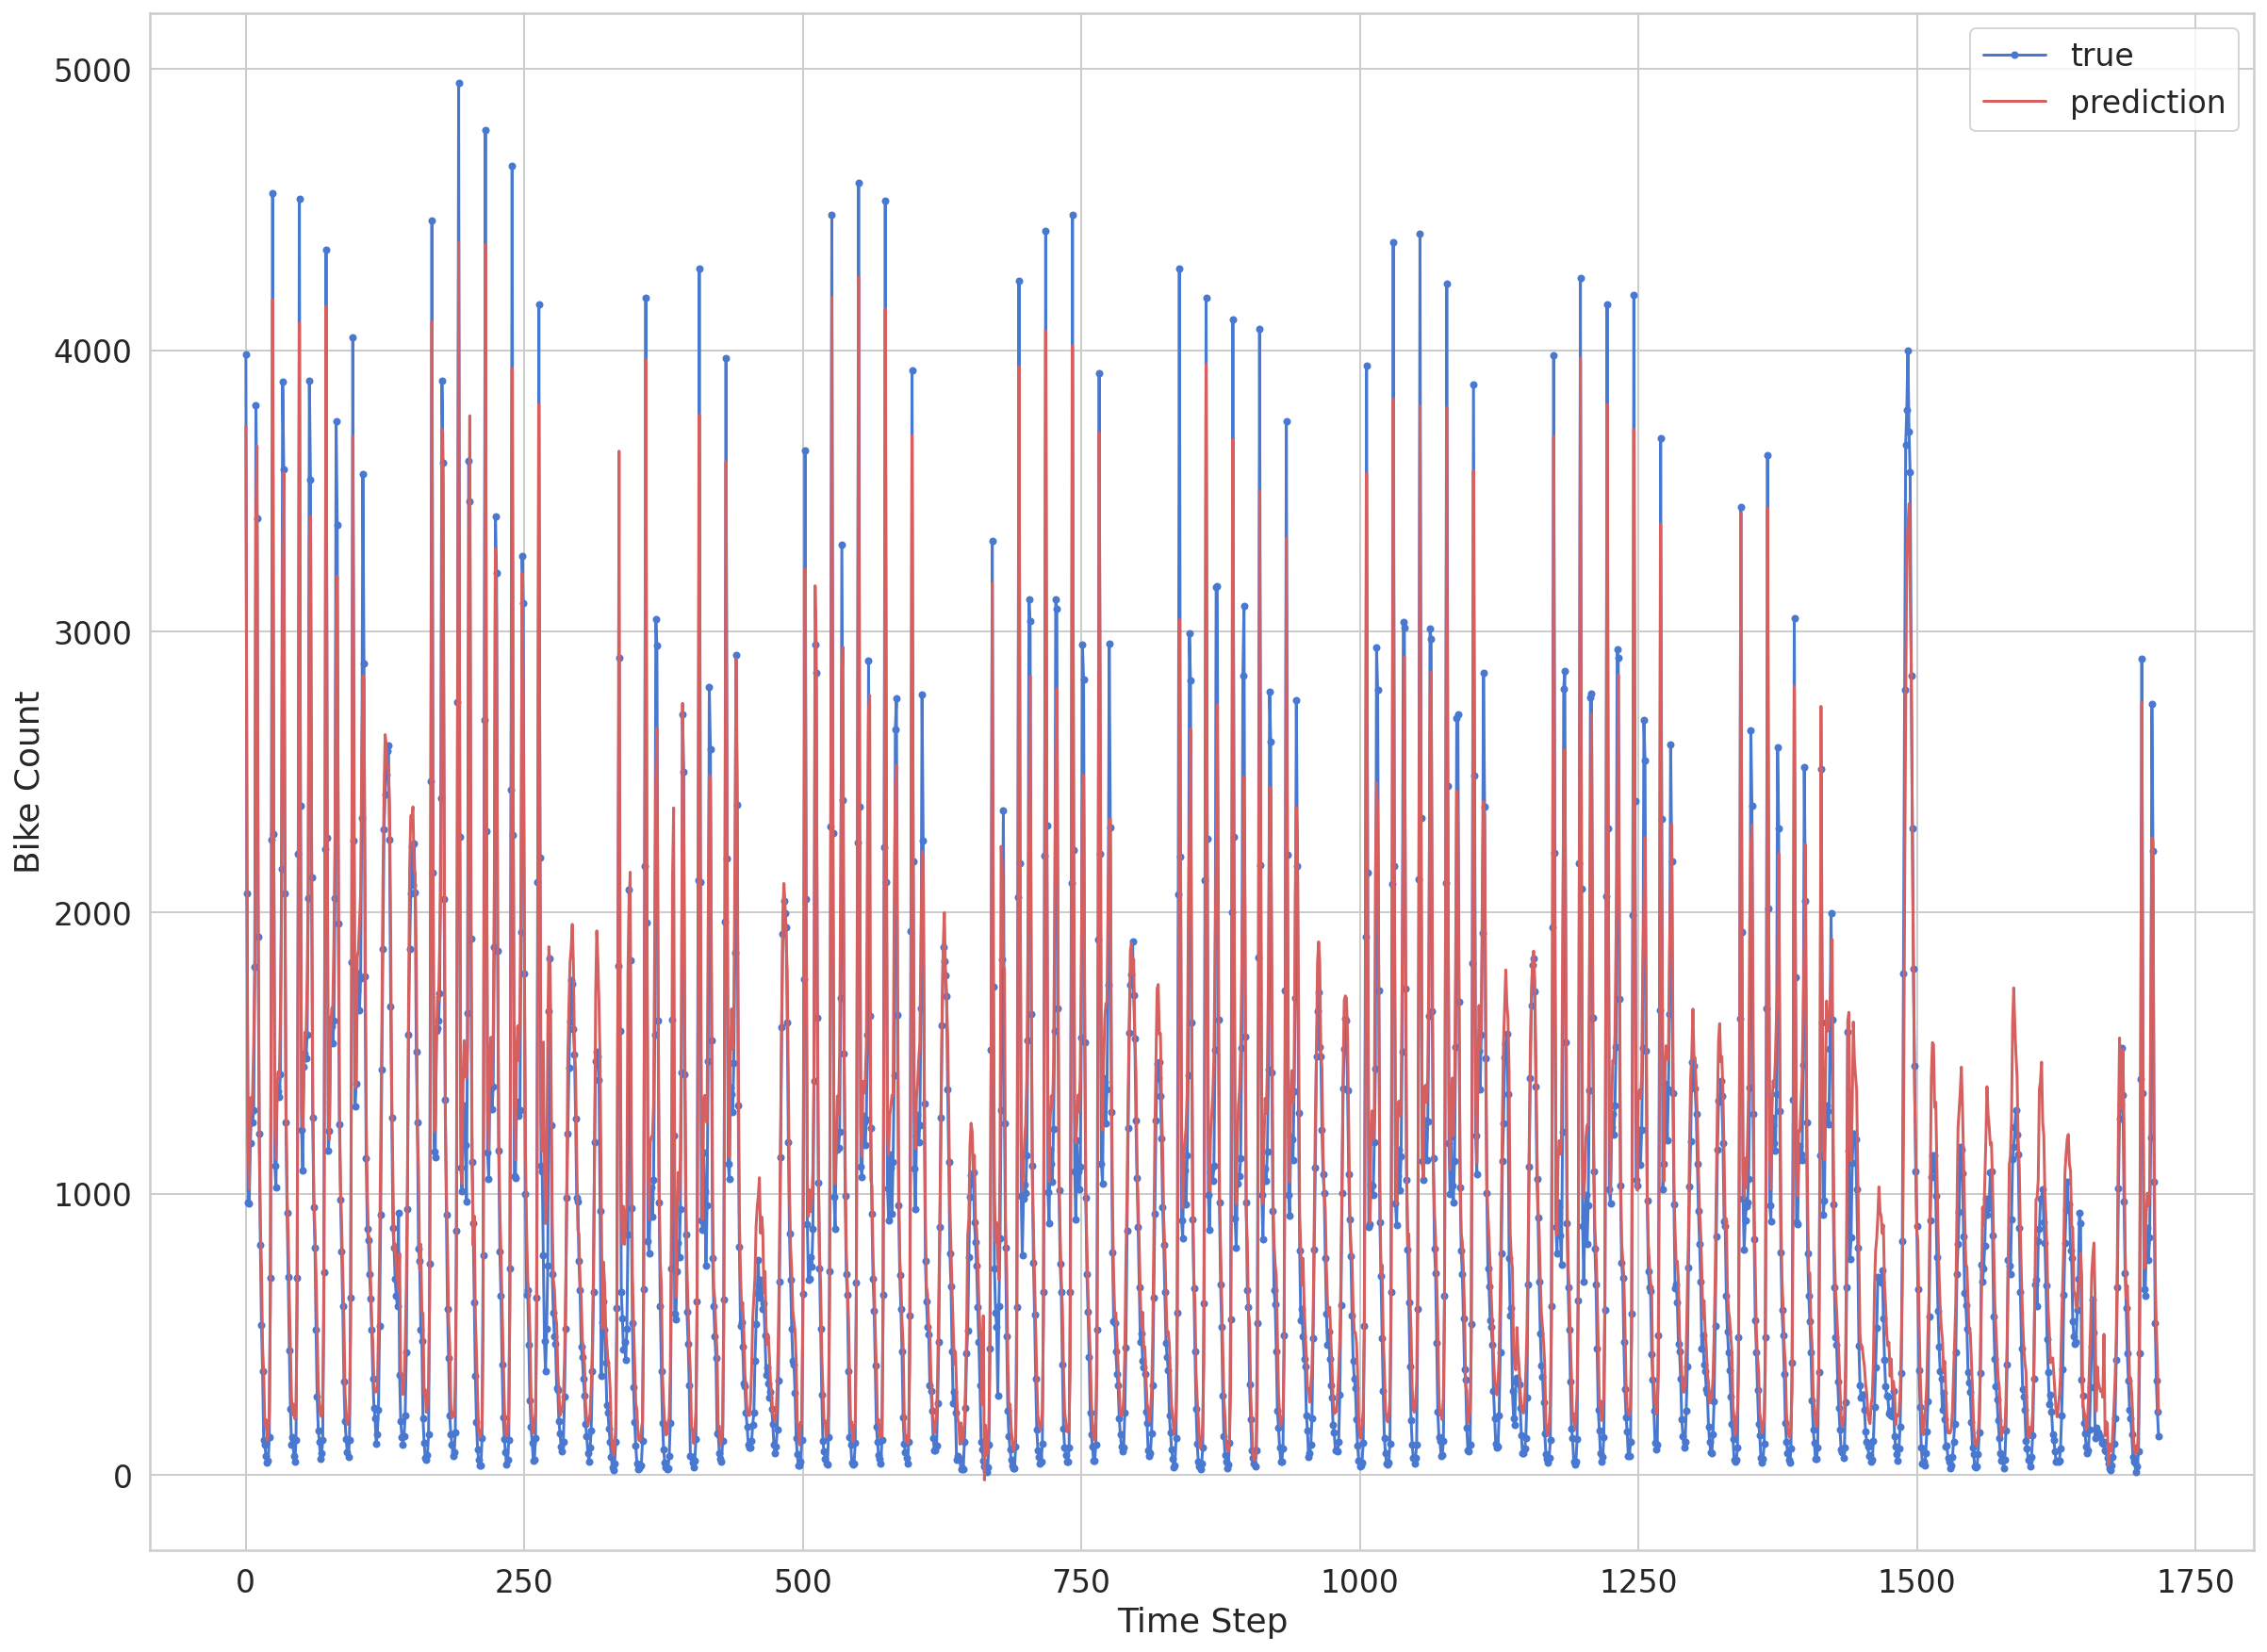

In [64]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [68]:
y_train_inv.flatten()

array([ 83.,  67.,  32., ..., 107., 107., 173.])

In [71]:
np.arange(0, len(y_train))

array([    0,     1,     2, ..., 15645, 15646, 15647])

In [70]:
y_train

array([-0.53305785, -0.54407713, -0.56818182, ..., -0.51652893,
       -0.51652893, -0.47107438])

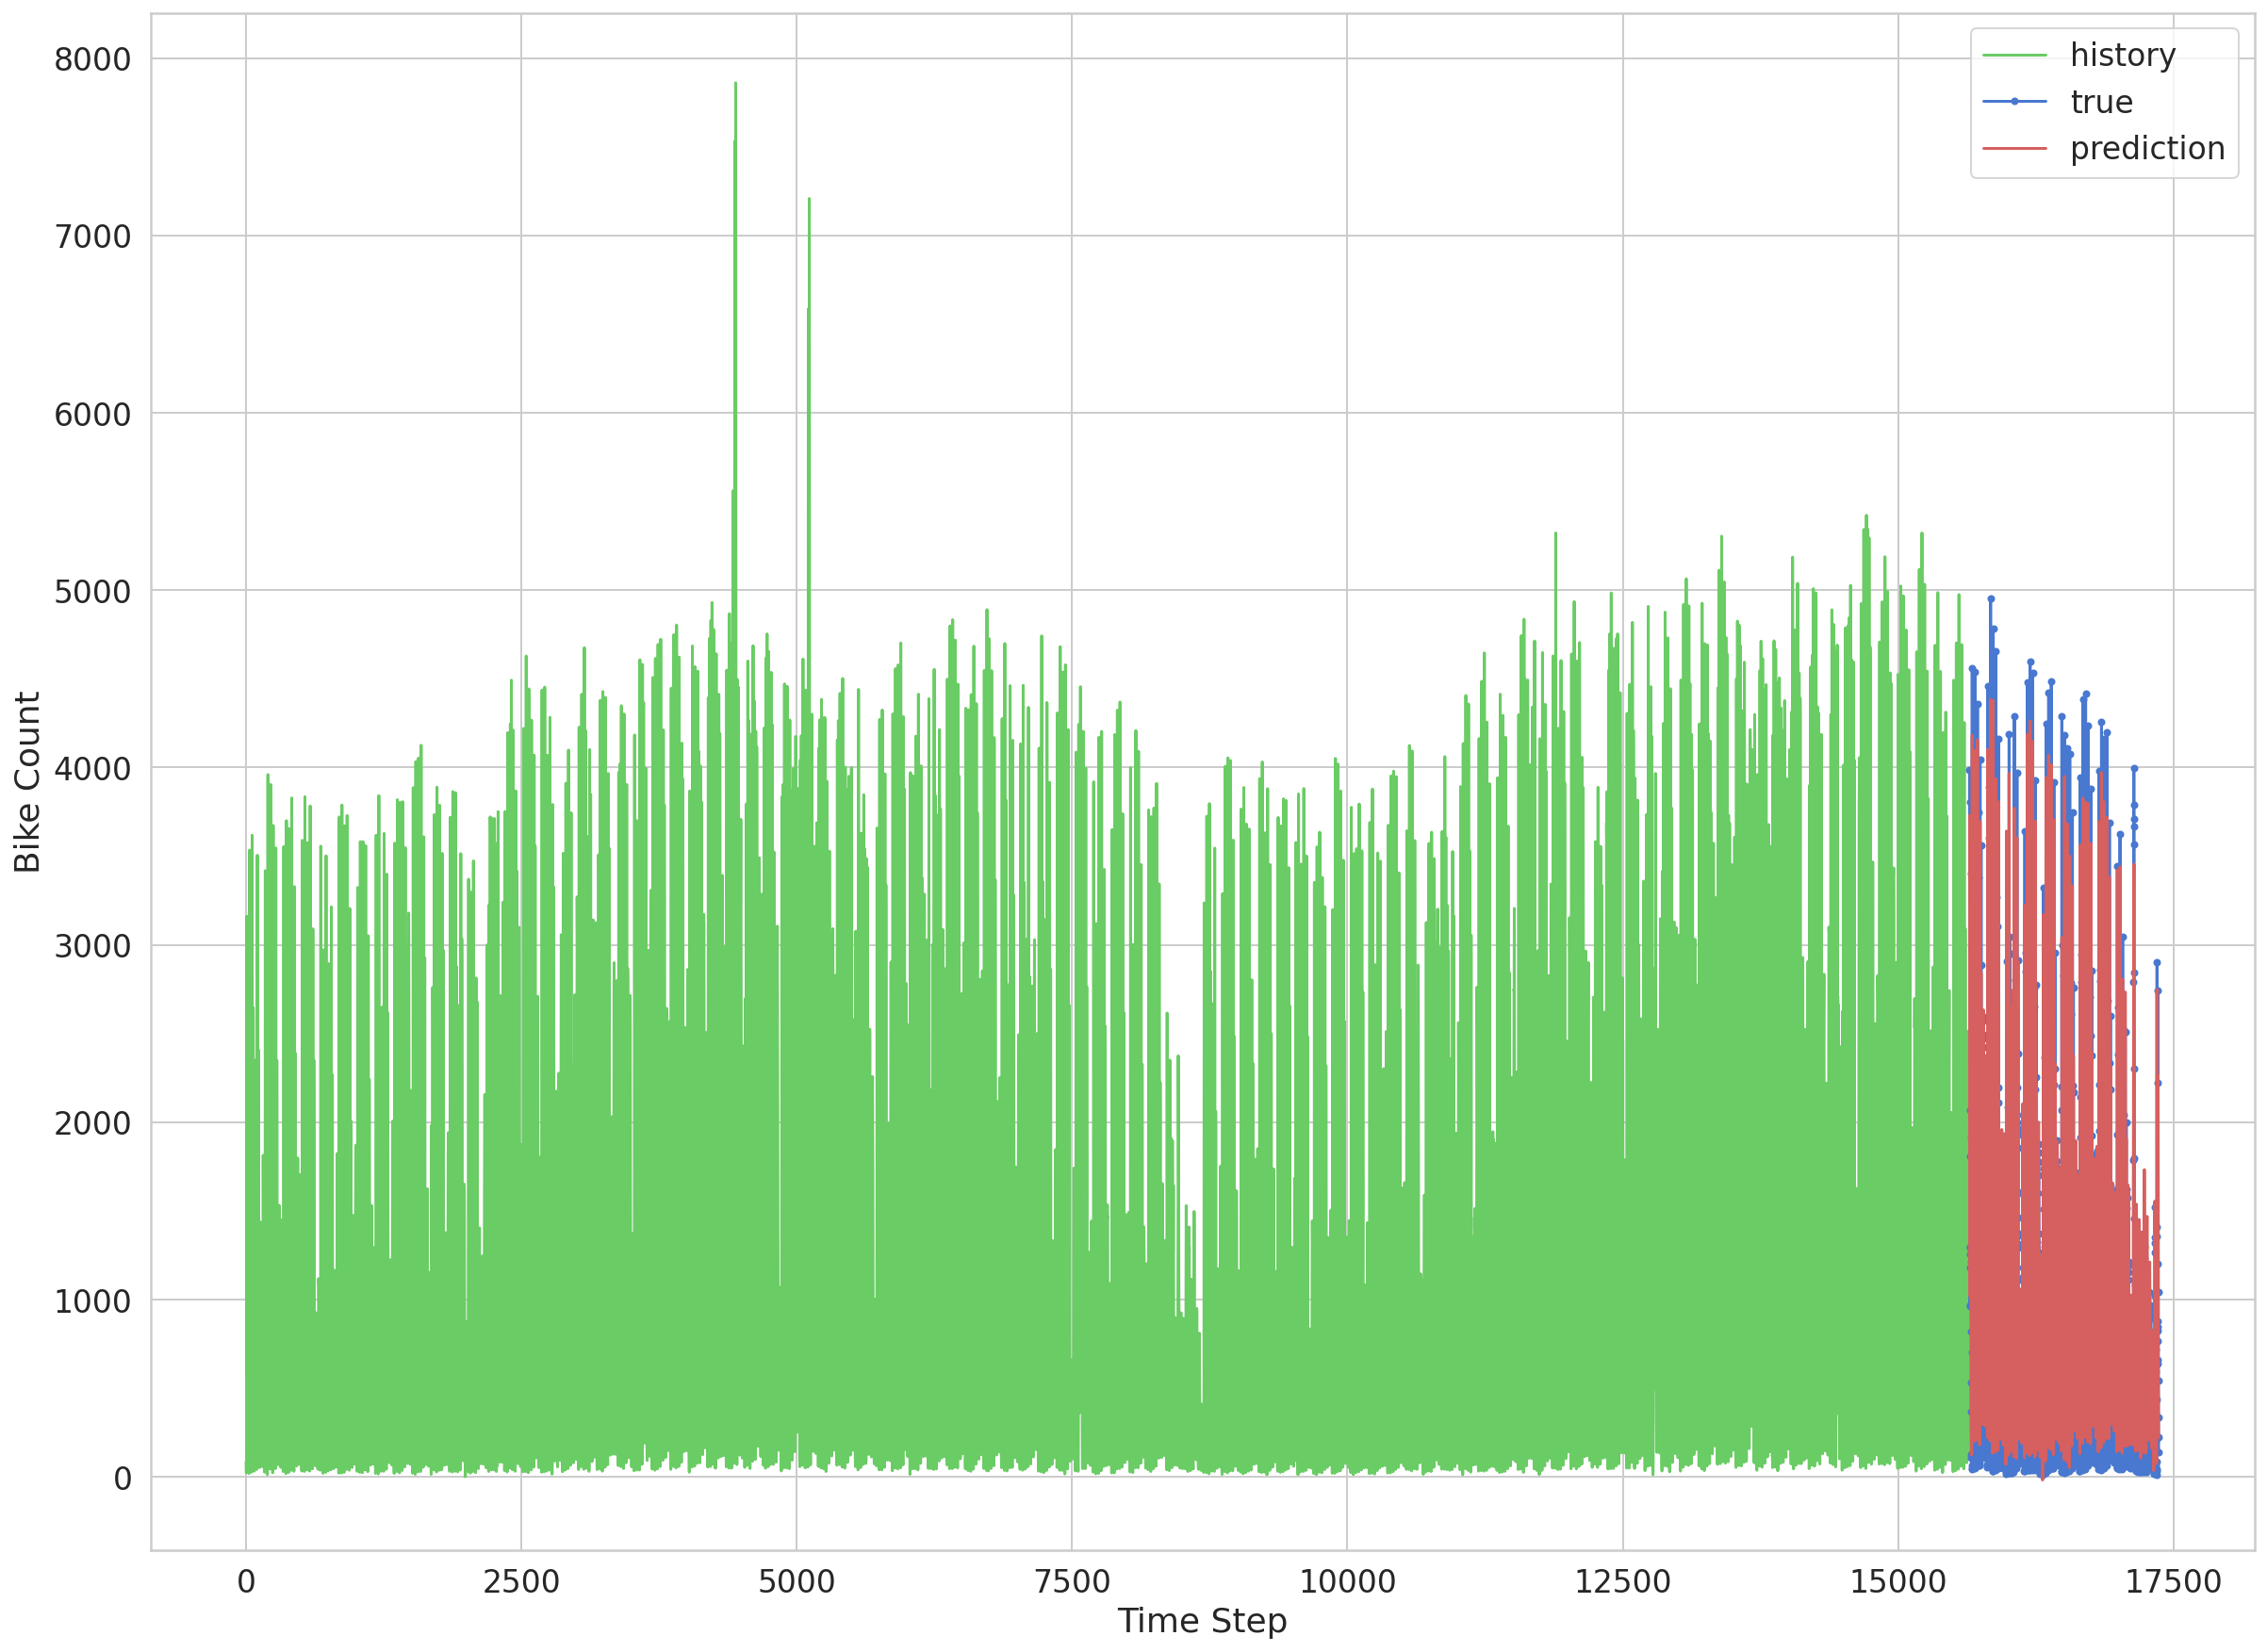

In [72]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();